<a href="https://colab.research.google.com/github/pkdyn/ManningVsReilly/blob/main/bkCvrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os

import tensorflow as tf
print (tf.__version__)
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


2.5.0


In [2]:

!wget --no-check-certificate \
https://github.com/pkdyn/ManningVsReilly/archive/refs/heads/main.zip 
!unzip -q /content/main.zip
!rm /content/main.zip



--2021-07-10 08:27:13--  https://github.com/pkdyn/ManningVsReilly/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pkdyn/ManningVsReilly/zip/refs/heads/main [following]
--2021-07-10 08:27:13--  https://codeload.github.com/pkdyn/ManningVsReilly/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]   4.56M  28.7MB/s    in 0.2s    

2021-07-10 08:27:13 (28.7 MB/s) - ‘main.zip’ saved [4779873]



In [3]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=30.0,
    height_shift_range=30.0,
    shear_range=10.0,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2, 
    preprocessing_function=preprocess_input) 

train_ds = train_datagen.flow_from_directory(
    "/content/ManningVsReilly-main/cvr_ds/train",
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='training') 

val_ds = train_datagen.flow_from_directory(
    "/content/ManningVsReilly-main/cvr_ds/train", 
    target_size=(100, 100),
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    subset='validation') 



Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [5]:
def make_model(learning_rate, droprate, size):
    base_model = Xception(
        weights='imagenet',
        input_shape=(100, 100, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(100, 100, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)
    outputs = keras.layers.Dense(1, activation='sigmoid')(drop)
    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )
    
    return model

83689472/83683744 [==============================] - 0s 0us/step
Epoch 1/15
15/15 [==============================] - 35s 206ms/step - loss: 0.5195 - accuracy: 0.7937 - val_loss: 0.3550 - val_accuracy: 0.9250
Epoch 2/15
15/15 [==============================] - 2s 128ms/step - loss: 0.2496 - accuracy: 0.9583 - val_loss: 0.1701 - val_accuracy: 0.9750
Epoch 3/15
15/15 [==============================] - 2s 128ms/step - loss: 0.1151 - accuracy: 0.9854 - val_loss: 0.1142 - val_accuracy: 0.9667
Epoch 4/15
15/15 [==============================] - 2s 132ms/step - loss: 0.0956 - accuracy: 0.9771 - val_loss: 0.0849 - val_accuracy: 0.9750
Epoch 5/15
15/15 [==============================] - 2s 131ms/step - loss: 0.0875 - accuracy: 0.9771 - val_loss: 0.0743 - val_accuracy: 0.9750
Epoch 6/15
15/15 [==============================] - 2s 130ms/step - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.1148 - val_accuracy: 0.9417
Epoch 7/15
15/15 [==============================] - 2s 131ms/step - loss: 0.0482 -

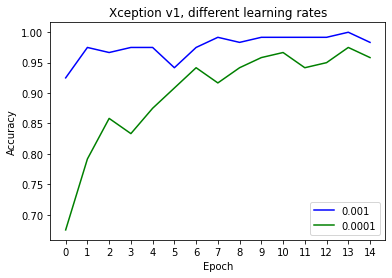

In [6]:
model = make_model(learning_rate=0.001, droprate=0.0, size=10)
history_0_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.0001, droprate=0.0, size=10)
history_0_0001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


epochs = np.arange(15)
val_0_001 = history_0_001.history['val_accuracy']
val_0_0001 = history_0_0001.history['val_accuracy']


plt.figure(figsize=(6, 4))

plt.plot(epochs, val_0_001, color='blue', linestyle='solid', label='0.001')
plt.plot(epochs, val_0_0001, color='green', linestyle='solid', label='0.0001')
plt.title('Xception v1, different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.xticks(epochs)
plt.legend()
plt.show()

Epoch 1/15
15/15 [==============================] - 5s 183ms/step - loss: 0.6312 - accuracy: 0.6646 - val_loss: 0.5417 - val_accuracy: 0.7917
Epoch 2/15
15/15 [==============================] - 2s 134ms/step - loss: 0.5152 - accuracy: 0.7979 - val_loss: 0.4383 - val_accuracy: 0.9167
Epoch 3/15
15/15 [==============================] - 2s 133ms/step - loss: 0.4787 - accuracy: 0.7854 - val_loss: 0.3695 - val_accuracy: 0.9417
Epoch 4/15
15/15 [==============================] - 2s 134ms/step - loss: 0.4112 - accuracy: 0.8917 - val_loss: 0.3160 - val_accuracy: 0.9833
Epoch 5/15
15/15 [==============================] - 2s 134ms/step - loss: 0.3807 - accuracy: 0.8896 - val_loss: 0.3041 - val_accuracy: 0.9667
Epoch 6/15
15/15 [==============================] - 2s 135ms/step - loss: 0.3525 - accuracy: 0.8958 - val_loss: 0.2548 - val_accuracy: 0.9833
Epoch 7/15
15/15 [==============================] - 2s 135ms/step - loss: 0.3268 - accuracy: 0.9104 - val_loss: 0.2354 - val_accuracy: 0.9667
Epoch 

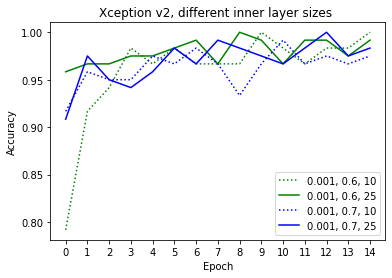

In [7]:

model = make_model(learning_rate=0.001, droprate=0.6, size=10)
history_10_6_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.001, droprate=0.6, size=25)
history_25_6_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


model = make_model(learning_rate=0.001, droprate=0.7, size=10)
history_10_7_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)
model = make_model(learning_rate=0.001, droprate=0.7, size=25)
history_25_7_001 = model.fit(train_ds, epochs=15, validation_data=val_ds)


epochs = np.arange(15)
val_10_6_001 = history_10_6_001.history['val_accuracy']
val_25_6_001 = history_25_6_001.history['val_accuracy']

val_10_7_001 = history_10_7_001.history['val_accuracy']
val_25_7_001 = history_25_7_001.history['val_accuracy']

plt.figure(figsize=(6, 4))
plt.plot(epochs, val_10_6_001, color='green', linestyle='dotted', label='0.001, 0.6, 10')
plt.plot(epochs, val_25_6_001, color='green', linestyle='solid', label='0.001, 0.6, 25')

plt.plot(epochs, val_10_7_001, color='blue', linestyle='dotted', label='0.001, 0.7, 10')
plt.plot(epochs, val_25_7_001, color='blue', linestyle='solid', label='0.001, 0.7, 25')

plt.title('Xception v2, different inner layer sizes ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()

In [8]:
model = make_model(learning_rate=0.001, droprate=0.6, size=25)
model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
15/15 [==============================] - 5s 187ms/step - loss: 0.4808 - accuracy: 0.7771 - val_loss: 0.3194 - val_accuracy: 0.8667
Epoch 2/30
15/15 [==============================] - 2s 136ms/step - loss: 0.2475 - accuracy: 0.8979 - val_loss: 0.2168 - val_accuracy: 0.9167
Epoch 3/30
15/15 [==============================] - 2s 133ms/step - loss: 0.2135 - accuracy: 0.9250 - val_loss: 0.1013 - val_accuracy: 0.9667
Epoch 4/30
15/15 [==============================] - 2s 134ms/step - loss: 0.1383 - accuracy: 0.9625 - val_loss: 0.1042 - val_accuracy: 0.9667
Epoch 5/30
15/15 [==============================] - 2s 133ms/step - loss: 0.1374 - accuracy: 0.9417 - val_loss: 0.1195 - val_accuracy: 0.9750
Epoch 6/30
15/15 [==============================] - 2s 132ms/step - loss: 0.0877 - accuracy: 0.9667 - val_loss: 0.0503 - val_accuracy: 0.9750
Epoch 7/30
15/15 [==============================] - 2s 134ms/step - loss: 0.0825 - accuracy: 0.9771 - val_loss: 0.0519 - val_accuracy: 0.9833
Epoch 

In [10]:
from keras.preprocessing import image
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():

  path= '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = np.array(img)
  X = np.array([x])
  X = preprocess_input(X)
  pred = model.predict(X)
  print(pred)
  print(pred[0])
  if pred[0]>0.5:
    print(fn + " is an O'Reilly book")
  else:
    print(fn + " is a Manning book")

Saving 0e23cee3e14fbc65fd455a1992f6aa5d.jpg to 0e23cee3e14fbc65fd455a1992f6aa5d.jpg
Saving 1e651dc6f9f054acc6fba6d217fb78a1.jpg to 1e651dc6f9f054acc6fba6d217fb78a1.jpg
Saving 3d313cc165455123cb9c7d71c508481c.jpg to 3d313cc165455123cb9c7d71c508481c.jpg
Saving 3e0319aad43f2d3b44813e43e43ad4ce.jpg to 3e0319aad43f2d3b44813e43e43ad4ce.jpg
Saving 7b87e4c71c174cc2ba73730cd1091026.jpg to 7b87e4c71c174cc2ba73730cd1091026.jpg
Saving 7bfefd8d49a674fe186388bdb5927432.jpg to 7bfefd8d49a674fe186388bdb5927432.jpg
Saving 7c3455f77c8ff86110e07859215b6b97.jpg to 7c3455f77c8ff86110e07859215b6b97.jpg
Saving 44b617061614853f0a492756e0a72df5.jpg to 44b617061614853f0a492756e0a72df5.jpg
Saving 45b16e5f9e6d7af59c62bbe82e2ceef8.jpg to 45b16e5f9e6d7af59c62bbe82e2ceef8.jpg
Saving 61c39504fbe9c641dd3c4f5ddb25d1b6.jpg to 61c39504fbe9c641dd3c4f5ddb25d1b6.jpg
Saving 67bf0162f8fffe603ab2171e15878aec.jpg to 67bf0162f8fffe603ab2171e15878aec.jpg
Saving 596c1d3c55b73ed374a7fba8d856589e.jpg to 596c1d3c55b73ed374a7fba8d8565